In [105]:
#Importing all basic libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
# Import .csv file and convert it to a DataFrame object
#renaming the columns
Clustering_Q2= pd.read_csv("crime_data.csv")
Clustering_Q2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [107]:
#information about the data
Clustering_Q2.dtypes ,'/n',Clustering_Q2.columns ,'/n',Clustering_Q2.info

(Unnamed: 0     object
 Murder        float64
 Assault         int64
 UrbanPop        int64
 Rape          float64
 dtype: object,
 '/n',
 Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object'),
 '/n',
 <bound method DataFrame.info of         Unnamed: 0  Murder  Assault  UrbanPop  Rape
 0          Alabama    13.2      236        58  21.2
 1           Alaska    10.0      263        48  44.5
 2          Arizona     8.1      294        80  31.0
 3         Arkansas     8.8      190        50  19.5
 4       California     9.0      276        91  40.6
 5         Colorado     7.9      204        78  38.7
 6      Connecticut     3.3      110        77  11.1
 7         Delaware     5.9      238        72  15.8
 8          Florida    15.4      335        80  31.9
 9          Georgia    17.4      211        60  25.8
 10          Hawaii     5.3       46        83  20.2
 11           Idaho     2.6      120        54  14.2
 12        Illinois    10.4      249        83  24.0


In [108]:
#given data have 5 columns.1st column have data about 50 different states 
#and remaining columns are saying about different crimes in those cities.
#so our DataFrame will have observations 0to 49(total 50) and and columns 0 to 4(total 5) 

# Normalising and Standardising data

In [109]:
#normalising data using Minmax scalar from sklearn.preprocessing

from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
Clustering_Q2_minmax = pd.DataFrame(trans.fit_transform(Clustering_Q2.iloc[:,1:]))
Clustering_Q2_minmax   

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [110]:
#another way of normalising data using new function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [111]:
Clustering_Q2_norm= norm_func(Clustering_Q2.iloc[:,1:])
Clustering_Q2_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [112]:
#Standardising the data using StandardScalar from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Clustering_Q2_stdsclr = pd.DataFrame(scaler.fit_transform(Clustering_Q2.iloc[:,1:]))
Clustering_Q2_stdsclr

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


# Hierarchial clustering of normalised data and ploting dendrograms

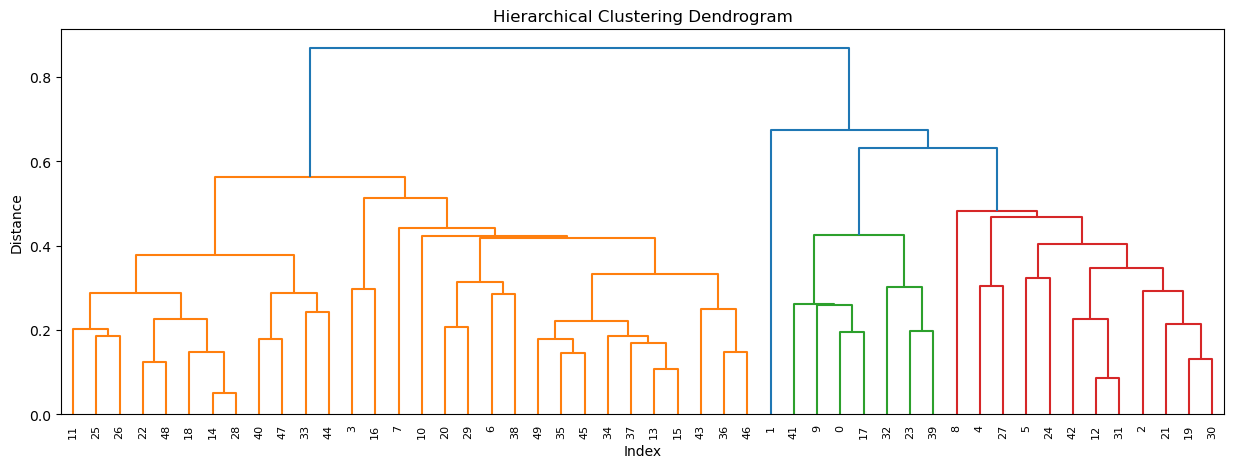

In [113]:
#clustering data using average euclidian distance method by scipy.cluster.hierarchy.linkage
import scipy.cluster.hierarchy as sch # for creating dendrogram 
z =sch. linkage(Clustering_Q2_minmax, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()     

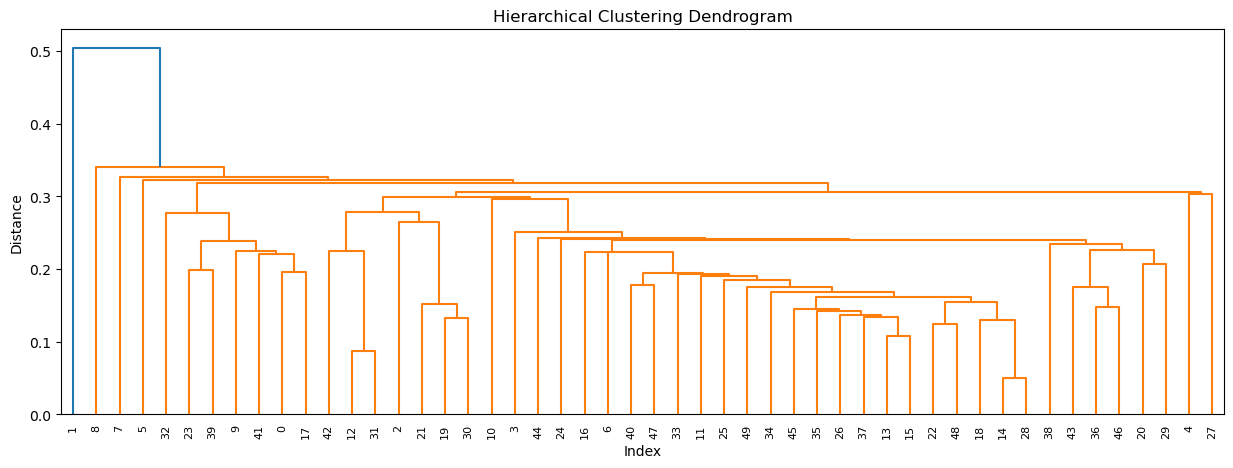

In [114]:
#clustering data using single linkage euclidian distance method by scipy.cluster.hierarchy.linkage
import scipy.cluster.hierarchy as sch # for creating dendrogram 
z =sch. linkage(Clustering_Q2_minmax, method="single",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show() 

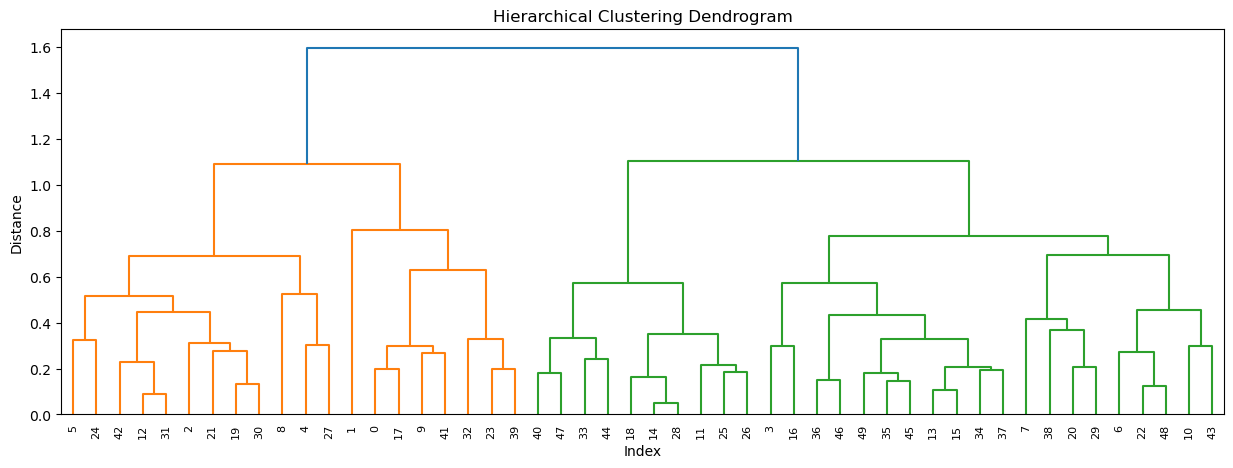

In [115]:
#clustering data using complete linkage euclidian distance method by scipy.cluster.hierarchy.linkage
import scipy.cluster.hierarchy as sch # for creating dendrogram 
z =sch. linkage(Clustering_Q2_minmax, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show() 

# creating cluster labels and adding cluster label column to DataFrame

In [116]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=3, linkage='average',affinity = "euclidean").fit(Clustering_Q2_minmax) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
Clustering_Q2['clust_label']=cluster_labels # creating a  new column and assigning it to new column 
Clustering_Q2_norm_clu=Clustering_Q2
Clustering_Q2_norm_clu

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust_label
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


# Exploring clusters

(array([0, 1, 2]), [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

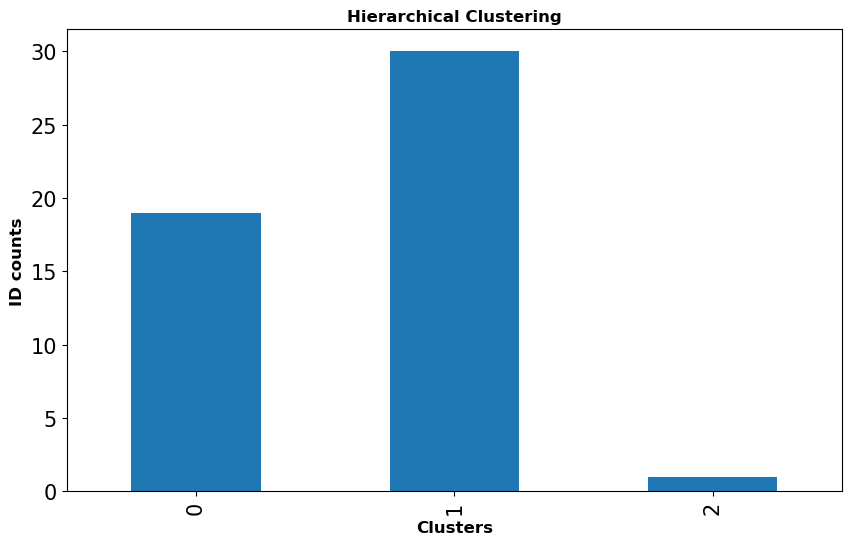

In [117]:
#creating barplot for the clusters 

fig, ax = plt.subplots(figsize=(10, 6))
Clustering_Q2.groupby(['clust_label']).count()['Unnamed: 0'].plot(kind='bar')
plt.ylabel('customers')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

In [118]:
Clustering_Q2_norm_clu.iloc[:,1:].groupby(Clustering_Q2_norm_clu.clust_label).mean()

,Murder,Assault,UrbanPop,Rape,clust_label
clust_label,,,,,
0,12.278947,254.842105,69.473684,28.357895,0.0
1,4.870000,114.433333,63.633333,15.943333,1.0
2,10.000000,263.000000,48.000000,44.500000,2.0


In [119]:
Cluster_1_norm=Clustering_Q2_norm_clu[Clustering_Q2_norm_clu.clust_label==0]
Cluster_1_norm.info(),'/n',Cluster_1_norm.mean(),'/n',Cluster_1_norm

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 42
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   19 non-null     object 
 1   Murder       19 non-null     float64
 2   Assault      19 non-null     int64  
 3   UrbanPop     19 non-null     int64  
 4   Rape         19 non-null     float64
 5   clust_label  19 non-null     int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 1.0+ KB


(None,
 '/n',
 Murder          12.278947
 Assault        254.842105
 UrbanPop        69.473684
 Rape            28.357895
 clust_label      0.000000
 dtype: float64,
 '/n',
         Unnamed: 0  Murder  Assault  UrbanPop  Rape  clust_label
 0          Alabama    13.2      236        58  21.2            0
 2          Arizona     8.1      294        80  31.0            0
 4       California     9.0      276        91  40.6            0
 5         Colorado     7.9      204        78  38.7            0
 8          Florida    15.4      335        80  31.9            0
 9          Georgia    17.4      211        60  25.8            0
 12        Illinois    10.4      249        83  24.0            0
 17       Louisiana    15.4      249        66  22.2            0
 19        Maryland    11.3      300        67  27.8            0
 21        Michigan    12.1      255        74  35.1            0
 23     Mississippi    16.1      259        44  17.1            0
 24        Missouri     9.0      17

In [120]:
Cluster_2_norm=Clustering_Q2_norm_clu[(Clustering_Q2_norm_clu.clust_label==1)]
Cluster_2_norm.info(),'/n',Cluster_2_norm.mean(),'/n',Cluster_2_norm

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 3 to 49
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   30 non-null     object 
 1   Murder       30 non-null     float64
 2   Assault      30 non-null     int64  
 3   UrbanPop     30 non-null     int64  
 4   Rape         30 non-null     float64
 5   clust_label  30 non-null     int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 1.6+ KB


(None,
 '/n',
 Murder           4.870000
 Assault        114.433333
 UrbanPop        63.633333
 Rape            15.943333
 clust_label      1.000000
 dtype: float64,
 '/n',
        Unnamed: 0  Murder  Assault  UrbanPop  Rape  clust_label
 3        Arkansas     8.8      190        50  19.5            1
 6     Connecticut     3.3      110        77  11.1            1
 7        Delaware     5.9      238        72  15.8            1
 10         Hawaii     5.3       46        83  20.2            1
 11          Idaho     2.6      120        54  14.2            1
 13        Indiana     7.2      113        65  21.0            1
 14           Iowa     2.2       56        57  11.3            1
 15         Kansas     6.0      115        66  18.0            1
 16       Kentucky     9.7      109        52  16.3            1
 18          Maine     2.1       83        51   7.8            1
 20  Massachusetts     4.4      149        85  16.3            1
 22      Minnesota     2.7       72        66  

In [121]:
Cluster_3_norm=Clustering_Q2_norm_clu[(Clustering_Q2_norm_clu.clust_label==2)]
Cluster_3_norm.info(),'/n',Cluster_3_norm.mean(),'/n',Cluster_3_norm

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 1 to 1
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1 non-null      object 
 1   Murder       1 non-null      float64
 2   Assault      1 non-null      int64  
 3   UrbanPop     1 non-null      int64  
 4   Rape         1 non-null      float64
 5   clust_label  1 non-null      int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 56.0+ bytes


(None,
 '/n',
 Murder          10.0
 Assault        263.0
 UrbanPop        48.0
 Rape            44.5
 clust_label      2.0
 dtype: float64,
 '/n',
   Unnamed: 0  Murder  Assault  UrbanPop  Rape  clust_label
 1     Alaska    10.0      263        48  44.5            2)

# Hierarchial clustering of standardised data and ploting dendrograms

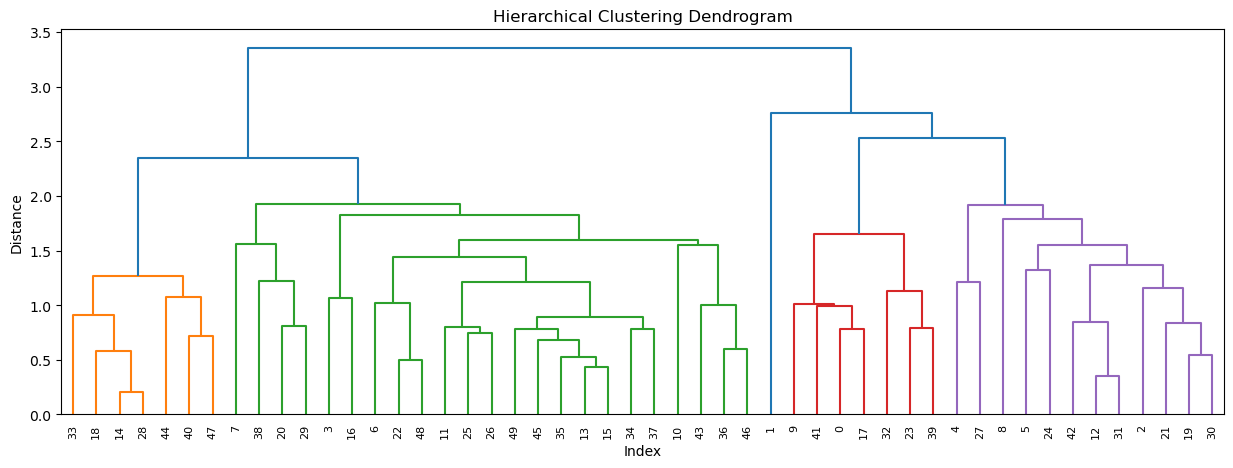

In [122]:
#clustering data using average euclidian distance method by scipy.cluster.hierarchy.linkage
import scipy.cluster.hierarchy as sch # for creating dendrogram 
z =sch. linkage(Clustering_Q2_stdsclr, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()     

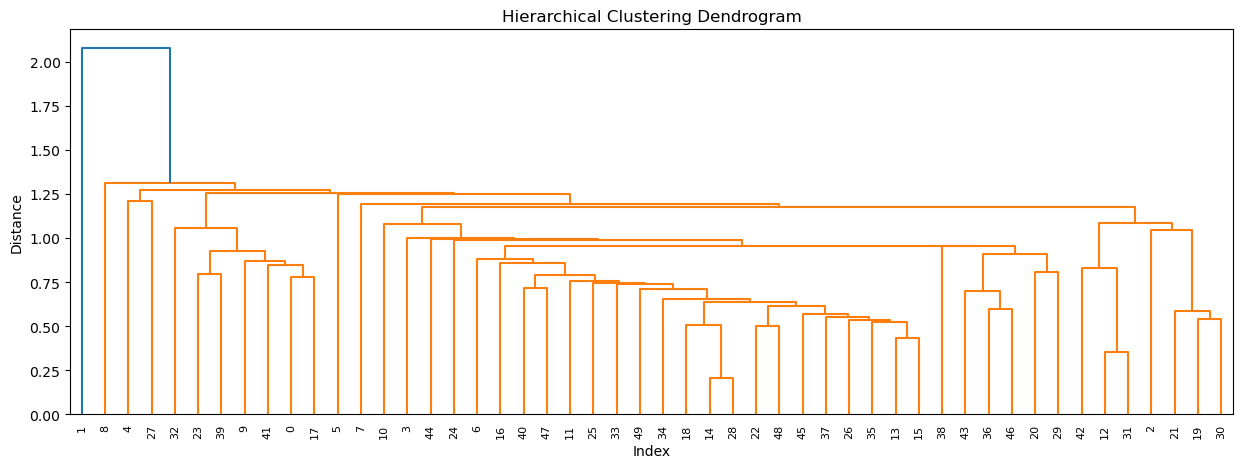

In [123]:
#clustering data using single euclidian distance method by scipy.cluster.hierarchy.linkage
import scipy.cluster.hierarchy as sch # for creating dendrogram 
z =sch. linkage(Clustering_Q2_stdsclr, method="single",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()     

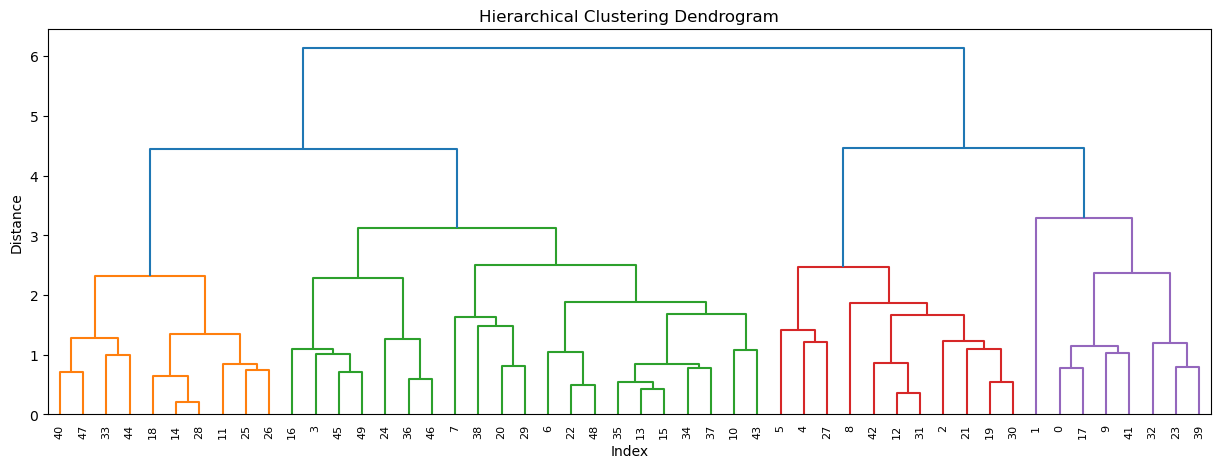

In [124]:
#clustering data using complete euclidian distance method by scipy.cluster.hierarchy.linkage
import scipy.cluster.hierarchy as sch # for creating dendrogram 
z =sch. linkage(Clustering_Q2_stdsclr, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()     

# creating cluster labels and adding cluster label column to DataFrame

In [125]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=4, linkage='average',affinity = "euclidean").fit(Clustering_Q2_stdsclr) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
Clustering_Q2['clust_label']=cluster_labels # creating a  new column and assigning it to new column 
Clustering_Q2_std_clu=Clustering_Q2
Clustering_Q2_std_clu

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust_label
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


# Exploring clusters

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

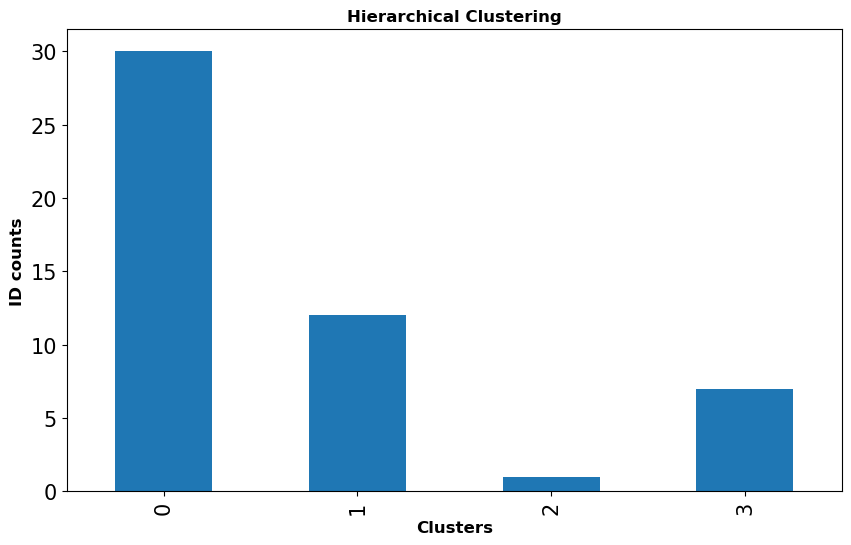

In [126]:
#creating barplot for the clusters 

fig, ax = plt.subplots(figsize=(10, 6))
Clustering_Q2_std_clu.groupby(['clust_label']).count()['Unnamed: 0'].plot(kind='bar')
plt.ylabel('customers')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

In [127]:
Cluster_1_std=Clustering_Q2_std_clu[(Clustering_Q2_std_clu.clust_label==0)]
Cluster_1_std.info(),'/n',Cluster_1_std.mean(),'/n',Cluster_1_std

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 3 to 49
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   30 non-null     object 
 1   Murder       30 non-null     float64
 2   Assault      30 non-null     int64  
 3   UrbanPop     30 non-null     int64  
 4   Rape         30 non-null     float64
 5   clust_label  30 non-null     int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 1.6+ KB


(None,
 '/n',
 Murder           4.870000
 Assault        114.433333
 UrbanPop        63.633333
 Rape            15.943333
 clust_label      0.000000
 dtype: float64,
 '/n',
        Unnamed: 0  Murder  Assault  UrbanPop  Rape  clust_label
 3        Arkansas     8.8      190        50  19.5            0
 6     Connecticut     3.3      110        77  11.1            0
 7        Delaware     5.9      238        72  15.8            0
 10         Hawaii     5.3       46        83  20.2            0
 11          Idaho     2.6      120        54  14.2            0
 13        Indiana     7.2      113        65  21.0            0
 14           Iowa     2.2       56        57  11.3            0
 15         Kansas     6.0      115        66  18.0            0
 16       Kentucky     9.7      109        52  16.3            0
 18          Maine     2.1       83        51   7.8            0
 20  Massachusetts     4.4      149        85  16.3            0
 22      Minnesota     2.7       72        66  

In [128]:
Cluster_2_std=Clustering_Q2_std_clu[(Clustering_Q2_std_clu.clust_label==1)]
Cluster_2_std.info(),'/n',Cluster_2_std.mean(),'/n',Cluster_2_std

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 2 to 42
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   12 non-null     object 
 1   Murder       12 non-null     float64
 2   Assault      12 non-null     int64  
 3   UrbanPop     12 non-null     int64  
 4   Rape         12 non-null     float64
 5   clust_label  12 non-null     int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 672.0+ bytes


(None,
 '/n',
 Murder          10.883333
 Assault        256.916667
 UrbanPop        78.333333
 Rape            32.250000
 clust_label      1.000000
 dtype: float64,
 '/n',
     Unnamed: 0  Murder  Assault  UrbanPop  Rape  clust_label
 2      Arizona     8.1      294        80  31.0            1
 4   California     9.0      276        91  40.6            1
 5     Colorado     7.9      204        78  38.7            1
 8      Florida    15.4      335        80  31.9            1
 12    Illinois    10.4      249        83  24.0            1
 19    Maryland    11.3      300        67  27.8            1
 21    Michigan    12.1      255        74  35.1            1
 24    Missouri     9.0      178        70  28.2            1
 27      Nevada    12.2      252        81  46.0            1
 30  New Mexico    11.4      285        70  32.1            1
 31    New York    11.1      254        86  26.1            1
 42       Texas    12.7      201        80  25.5            1)

In [129]:
Cluster_3_std=Clustering_Q2_std_clu[(Clustering_Q2_std_clu.clust_label==2)]
Cluster_3_std.info(),'/n',Cluster_3_std.mean(),'/n',Cluster_3_std

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 1 to 1
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1 non-null      object 
 1   Murder       1 non-null      float64
 2   Assault      1 non-null      int64  
 3   UrbanPop     1 non-null      int64  
 4   Rape         1 non-null      float64
 5   clust_label  1 non-null      int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 56.0+ bytes


(None,
 '/n',
 Murder          10.0
 Assault        263.0
 UrbanPop        48.0
 Rape            44.5
 clust_label      2.0
 dtype: float64,
 '/n',
   Unnamed: 0  Murder  Assault  UrbanPop  Rape  clust_label
 1     Alaska    10.0      263        48  44.5            2)

In [130]:
Cluster_4_std=Clustering_Q2_std_clu[(Clustering_Q2_std_clu.clust_label==3)]
Cluster_4_std.info(),'/n',Cluster_4_std.mean(),'/n',Cluster_4_std

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 41
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   7 non-null      object 
 1   Murder       7 non-null      float64
 2   Assault      7 non-null      int64  
 3   UrbanPop     7 non-null      int64  
 4   Rape         7 non-null      float64
 5   clust_label  7 non-null      int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 392.0+ bytes


(None,
 '/n',
 Murder          14.671429
 Assault        251.285714
 UrbanPop        54.285714
 Rape            21.685714
 clust_label      3.000000
 dtype: float64,
 '/n',
         Unnamed: 0  Murder  Assault  UrbanPop  Rape  clust_label
 0          Alabama    13.2      236        58  21.2            3
 9          Georgia    17.4      211        60  25.8            3
 17       Louisiana    15.4      249        66  22.2            3
 23     Mississippi    16.1      259        44  17.1            3
 32  North Carolina    13.0      337        45  16.1            3
 39  South Carolina    14.4      279        48  22.5            3
 41       Tennessee    13.2      188        59  26.9            3)

# KMeans clustering

In [131]:
#Importing K-Means from sklearn for clustering
from sklearn.cluster import KMeans

In [132]:
# Import .csv file and convert it to a DataFrame object
#renaming the columns
KMeans_Clustering_Q2= pd.read_csv("crime_data.csv")
KMeans_Clustering_Q2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [133]:
#Normalising dataframe
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)   

In [134]:
KMeans_Clustering_Q2 = norm_func(KMeans_Clustering_Q2.iloc[:,1:])
KMeans_Clustering_Q2

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


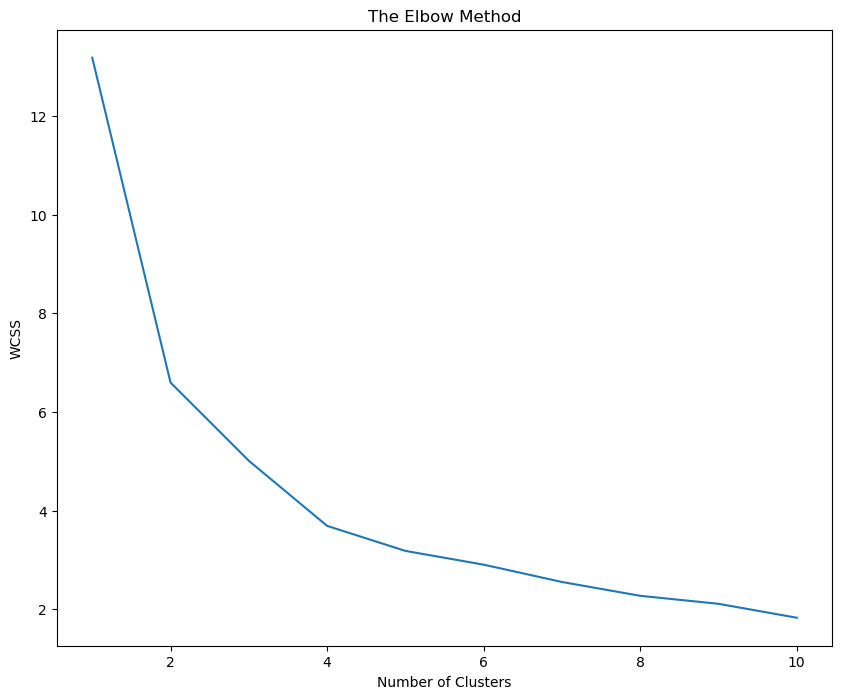

In [135]:
#analysing Elbow Plot for optimal number of clusters
fig = plt.figure(figsize=(10, 8))
WCSS = []    
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(KMeans_Clustering_Q2)
    WCSS.append(clf.inertia_) # inertia another name for wcss
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()  

In [136]:
#in above curve we find that there is 5 clusters

In [137]:
#fitting model
clf = KMeans(n_clusters=5)
KMeans_Clustering_Q2_model = clf.fit_predict(KMeans_Clustering_Q2)  

In [138]:
# Import .csv file and convert it to a DataFrame object
#renaming the columns
KMeans_Clustering_Q2= pd.read_csv("crime_data.csv")
KMeans_Clustering_Q2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [151]:
#adding cluster label column in DataFrame
md=pd.Series(KMeans_Clustering_Q2_model)  # converting numpy array into pandas series object 
KMeans_Clustering_Q2['clust']=md # creating a  new column and assigning it to new column 
KMeans_Clustering_Q2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,4
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,4
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,2


In [152]:
#analysing clusters
KMeans_Clustering_Q2.iloc[:,1:7].groupby(KMeans_Clustering_Q2.clust).mean() 

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,4.955556,125.444444,80.111111,17.788889,0.0
1,2.680000,70.100000,51.000000,10.910000,1.0
2,14.671429,251.285714,54.285714,21.685714,2.0
3,10.966667,264.000000,76.500000,33.608333,3.0
4,6.975000,148.416667,62.333333,19.775000,4.0


Text(0.5, 1.0, 'Clusters using KMeans')

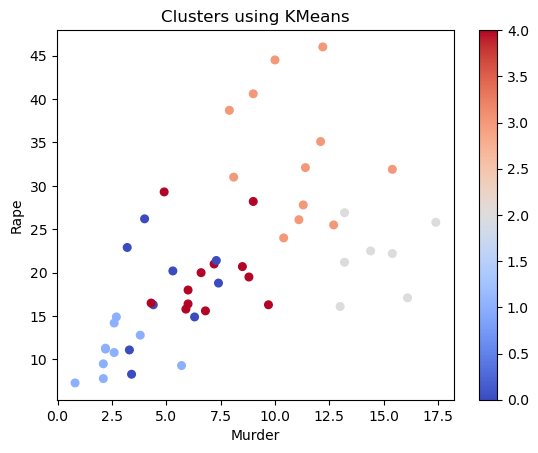

In [141]:
KMeans_Clustering_Q2.plot(x="Murder",y ="Rape",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')   

In [142]:
WCSS

[13.184122550256443,
 6.596893867946198,
 5.010878493006418,
 3.690820410392112,
 3.1831577316766535,
 2.904256561468247,
 2.5527912472844188,
 2.2724694709599706,
 2.110250590324967,
 1.8281017801703485]

# DBSCAN

In [143]:
#Importing DBSCAN 
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [153]:
#reading data for DBSCAN
DBSCAN_Clustering_Q2 = pd.read_csv('crime_data.csv')
DBSCAN_Clustering_Q2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [145]:
DBSCAN_Clustering_Q2=DBSCAN_Clustering_Q2.drop(['Unnamed: 0'],axis=1)

In [146]:
stscaler = StandardScaler().fit(DBSCAN_Clustering_Q2)
X = stscaler.transform(DBSCAN_Clustering_Q2)
X   

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [147]:
DBSCAN = DBSCAN(eps=0.475, min_samples=5)
DBSCAN.fit(X)                      

DBSCAN(eps=0.475)

In [154]:
cl=pd.DataFrame(DBSCAN.labels_,columns=['cluster'])   

In [155]:
DBSCAN_Clustering_Q2 = pd.concat([DBSCAN_Clustering_Q2,cl],axis=1)  
DBSCAN_Clustering_Q2   

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,-1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1


Text(0.5, 1.0, 'Clusters using DBScan')

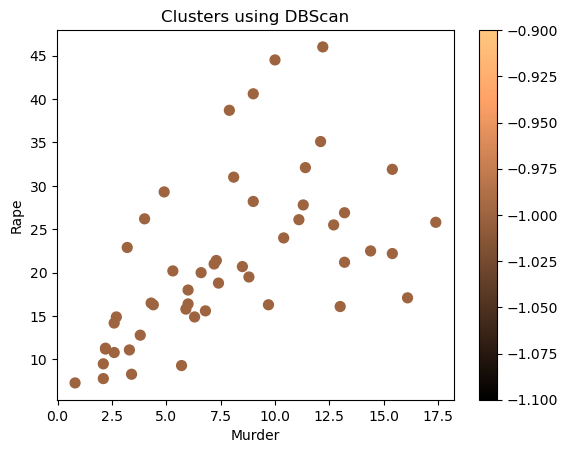

In [156]:
import matplotlib.pyplot as plt 
DBSCAN_Clustering_Q2.plot(x="Murder",y ="Rape",c=DBSCAN.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper) 
plt.title('Clusters using DBScan')      